In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:

archivo_original = 'vacunas_covid.csv'
archivo_limpiado = 'vacunas_covid-limpio.csv'

In [26]:
ds = pd.read_csv(archivo_original)
ds.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210227,c7ba6f9424c59a543e8803495c1061db,PERSONAL DE SALUD,39.0,MASCULINO,20210225,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO
1,20210227,51ffbe83478f1e64da17fe2756a9594b,PERSONAL DE SALUD,37.0,FEMENINO,20210219,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
2,20210227,54048fe3b06c35f14350d7e81340bdbd,PERSONAL DE SALUD,44.0,MASCULINO,20210220,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
3,20210227,746ad64c513b5d53b987ed48a6b45f77,PERSONAL DE SALUD,54.0,FEMENINO,20210220,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
4,20210227,80f0a41dd63af3b96d4a80bfab2eaa61,PERSONAL DE SALUD,35.0,FEMENINO,20210225,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO


In [27]:
ds.describe()

,FECHA_CORTE,EDAD,FECHA_VACUNACION,DOSIS
count,265608.0,265502.000000,2.656080e+05,265608.0
mean,20210227.0,41.781644,2.021022e+07,1.0
std,0.0,11.828207,5.332878e+00,0.0
min,20210227.0,18.000000,2.021021e+07,1.0
25%,20210227.0,32.000000,2.021021e+07,1.0
50%,20210227.0,40.000000,2.021022e+07,1.0
75%,20210227.0,50.000000,2.021022e+07,1.0
max,20210227.0,75.000000,2.021023e+07,1.0


In [28]:
sin_edad = pd.isnull(ds['EDAD'])
numOfRows = len(sin_edad[sin_edad == True].index)
print('Personas sin edad : ', numOfRows)

Personas sin edad :  106


In [29]:
sin_sexo = pd.isnull(ds['SEXO'])
numOfRows = len(sin_sexo[sin_sexo == True].index)
print('Personas sin sexo : ', numOfRows)

Personas sin sexo :  889


In [30]:
ds.drop('FECHA_CORTE', inplace=True, axis=1)

In [31]:
ds.drop('UUID', inplace=True, axis=1)

In [32]:
ds_sin_vacios = ds.dropna()

In [33]:
ds_sin_vacios.loc[ds_sin_vacios['SEXO'] == 'MASCULINO',['SEXO']] = 1

/Users/av_jtirado/opt/anaconda3/envs/bruisedating/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [34]:
ds_sin_vacios.loc[ds_sin_vacios['SEXO'] == 'FEMENINO',['SEXO']] = 0

In [35]:
#ds_sin_vacios['SEXO'] = ds_sin_vacios.SEXO.apply(lambda s: 1 if s == 'MASCULINO' else 0)

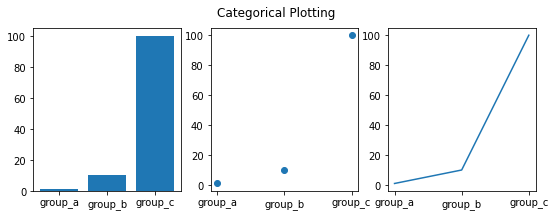

In [36]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

In [39]:
hombres = ds_sin_vacios.apply(lambda x: True if x['SEXO'] == 1 else False , axis=1)
hombres_numOfRows = len(hombres[hombres == True].index)
print('Hombres : ', hombres_numOfRows)

Hombres :  89681


In [40]:
mujeres = ds_sin_vacios.apply(lambda x: True if x['SEXO'] == 0 else False , axis=1)
mujeres_numOfRows = len(mujeres[mujeres == True].index)
print('Mujeres : ', mujeres_numOfRows)

Mujeres :  175027


In [42]:
ds_sin_vacios['SEXO'].value_counts()

0    175027
1     89681
Name: SEXO, dtype: int64

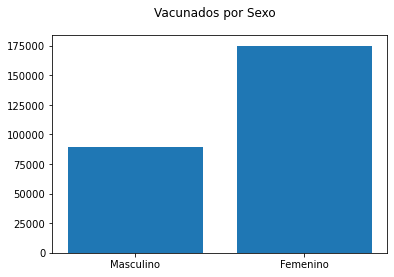

In [45]:
names = ['Masculino', 'Femenino']
values = [hombres_numOfRows, mujeres_numOfRows]
plt.bar(names, values)
plt.suptitle('Vacunados por Sexo')
plt.show()

In [ ]:
#Guardar archivo corregido
ds_sin_vacios.to_csv(archivo_limpiado, index=False)